# Postprocessing with pyGOLD
___
This notebook demonstrates how to use the pyGOLD postprocessing functions. These functions are provided for use with benchmark problems defined in only one dimension. For problems defined in multiple dimensions, it is recommended to use the COCOPP postprocessing integration. However, these postprocessing functions will work on multi-dimensional data.

In [1]:
import pygold
import pygold.problems.standard_problems as bp
import scipy.optimize as opt

# To display the results - not required for the tests
import glob
import os
import matplotlib.pyplot as plt
from IPython.display import Markdown

## Select Problems, Solvers, and Generate Benchmark Data
---

We'll use all 2D standard problems as our benchmark problems and test the algorithms shgo, dual annealing, differential evolution, and basinhopping from scipy.optimize. `run_solvers` will run the solvers on the problems and save the results in the output_data/ folder in the COCO format. We want to consider energy metrics as well so we'll set `track_energy=True`.

In [2]:
# Select problems
problems = bp.__2D__

# Select solvers
solvers = [opt.shgo, opt.dual_annealing, opt.differential_evolution, opt.basinhopping]

# Run solvers on the selected problems
pygold.run_solvers(solvers, problems, n_iters=5, verbose=False, track_energy=True)

[codecarbon WARNING @ 11:13:44] Multiple instances of codecarbon are allowed to run at the same time.
/Users/bselvage/Library/CloudStorage/OneDrive-NREL/VSCode/global_opt_bench/pygold/problems/standard_problems.py:646: RuntimeWarning: overflow encountered in exp
  term2 = xp.exp(abs_fn(1 - (xp.sqrt(x1**2 + x2**2) / np.pi)))
/Users/bselvage/anaconda3/envs/pyGOLD/lib/python3.13/site-packages/scipy/optimize/_numdiff.py:596: RuntimeWarning: invalid value encountered in subtract
  df = fun(x1) - f0
/Users/bselvage/Library/CloudStorage/OneDrive-NREL/VSCode/global_opt_bench/pygold/default_runners.py:163: UserWarning: Solver differential_evolution failed on <class 'pygold.problems.standard_problems.RosenbrockConstrained'> with dimensions 2, run 1/5: `constraint` of an unknown type is passed.
  warnings.warn(f"Solver {solver.__name__} failed on {problem} with dimensions {n_dims}, run {i+1}/{n_iters}: {e}")
/Users/bselvage/Library/CloudStorage/OneDrive-NREL/VSCode/global_opt_bench/pygold/default

## Postprocess Data
---
To postprocess the data, call the postprocessing function with the folders where the data is saved. Note that the data must be saved in the COCO format. We also specify the location of the energy data.

In [ ]:
x = pygold.postprocessing.postprocess_data(["output_data/dual_annealing", "output_data/shgo", "output_data/differential_evolution", "output_data/basinhopping"],
        energy_file="output_data/energy_data.csv")

## Display the Results
---
Calling the postprocessing function saves the plots to the folder ppfigures/. Lets display them. First, we will show the metrics based on number of function evalutions (saved in ppfigures/fevals.) We will also show the summary dataframe. 

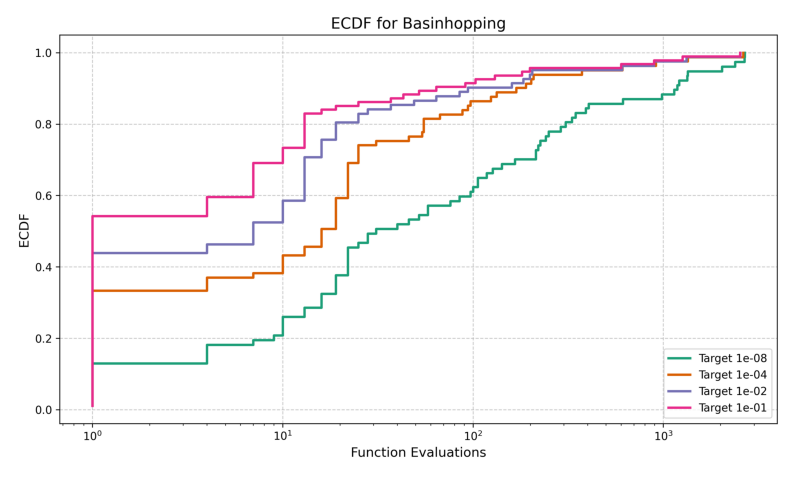

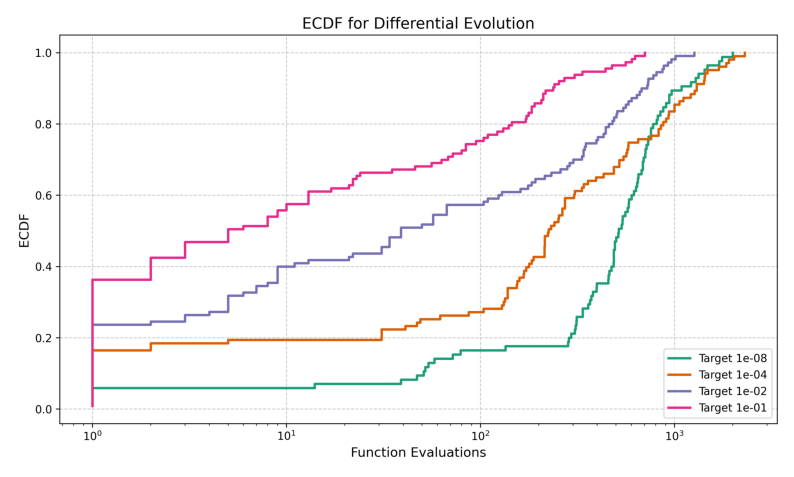

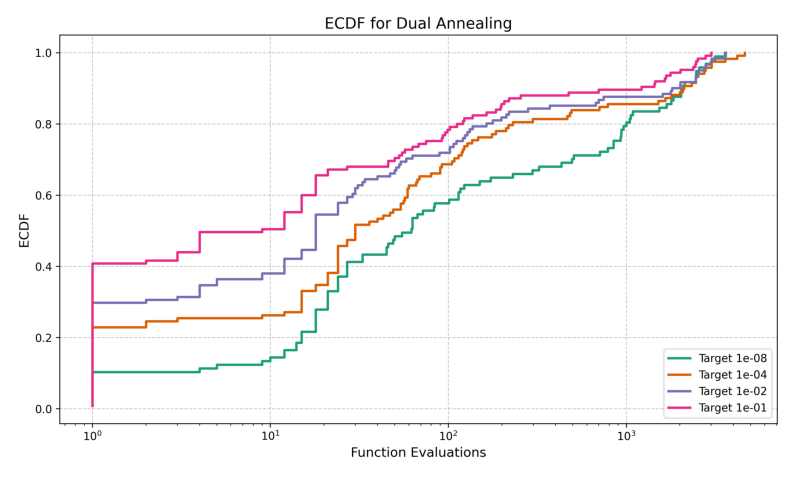

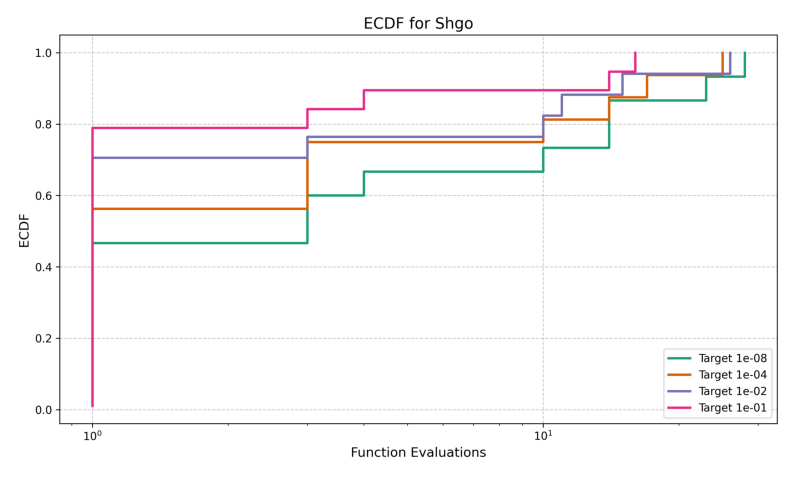

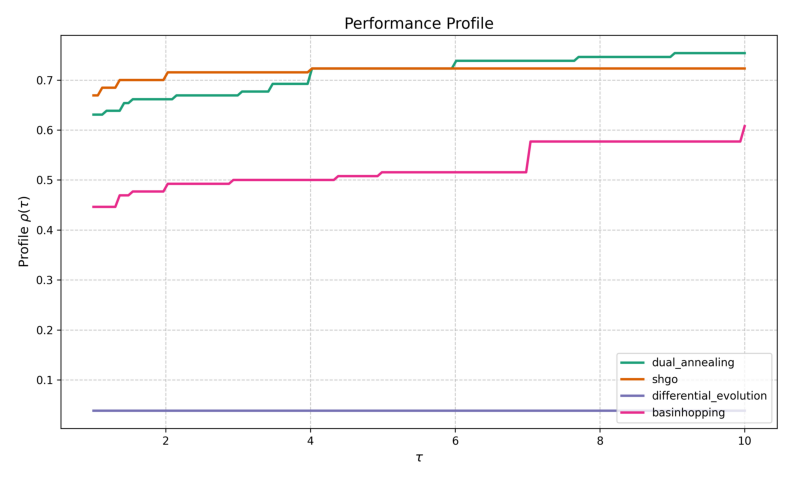

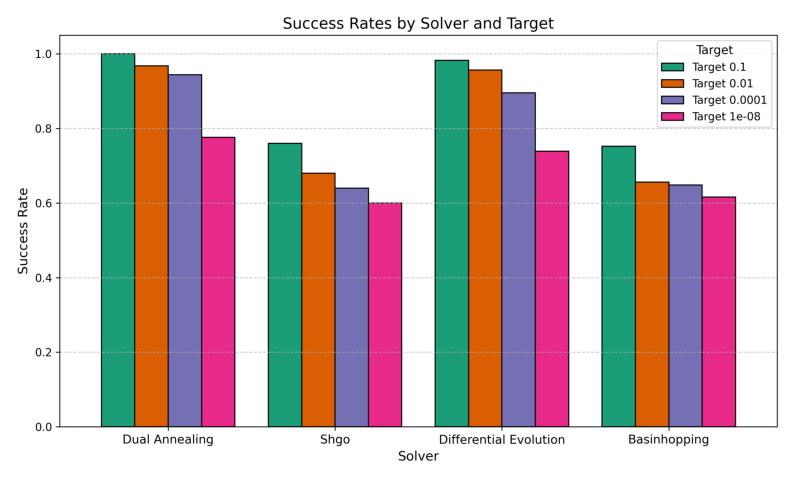

## Average fevals per problem among successful runs:

,problem,solver,n_dims,target_0.1,target_0.01,target_0.0001,target_1e-08
0,Beale,basinhopping,2,1.000000,1.000000,1.000000,1429.200000
1,Beale,dual_annealing,2,1.000000,1.000000,1.000000,179.800000
2,Beale,shgo,2,1.000000,1.000000,1.000000,14.000000
3,Bird,basinhopping,2,1.000000,1.000000,1.000000,5.000000
4,Bird,dual_annealing,2,1.000000,1.000000,1.000000,10.400000
...,...,...,...,...,...,...,...
71,Schaffer4,shgo,2,NaN,NaN,NaN,NaN
72,Shubert,basinhopping,2,370.000000,373.000000,384.400000,832.000000
73,Shubert,dual_annealing,2,107.400000,112.200000,124.800000,1953.333333
74,Shubert,shgo,2,NaN,NaN,NaN,NaN


In [4]:
# Path to the figures
figure_path = "ppfigures/fevals"

# Get all figure files in the directory
figure_files = glob.glob(os.path.join(figure_path, "*.png"))
figure_files.sort()

# Display each figure
for fig_file in figure_files:
    plt.figure(figsize=(10, 8))
    img = plt.imread(fig_file)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

# Display dataframe
display(Markdown("## Average fevals per problem among successful runs:"))
display(x['data']['mean_fevals'])

And next we will show the energy metrics (saved in ppfigures/energy).

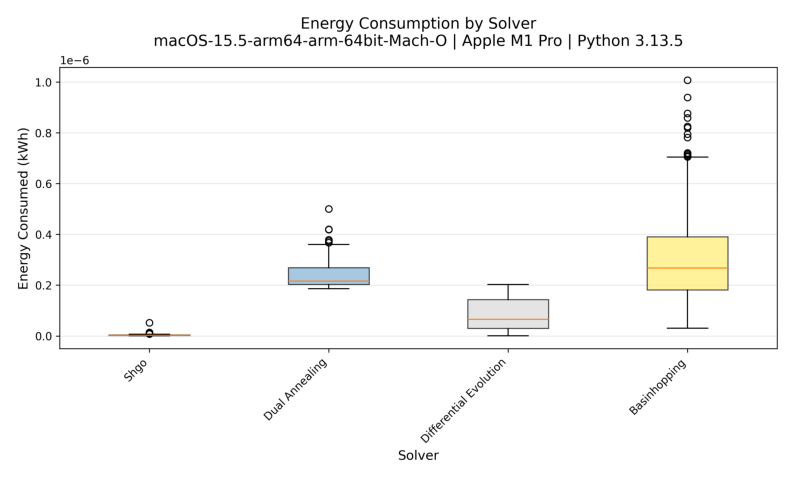

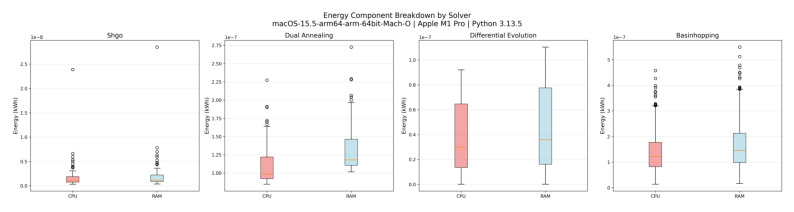

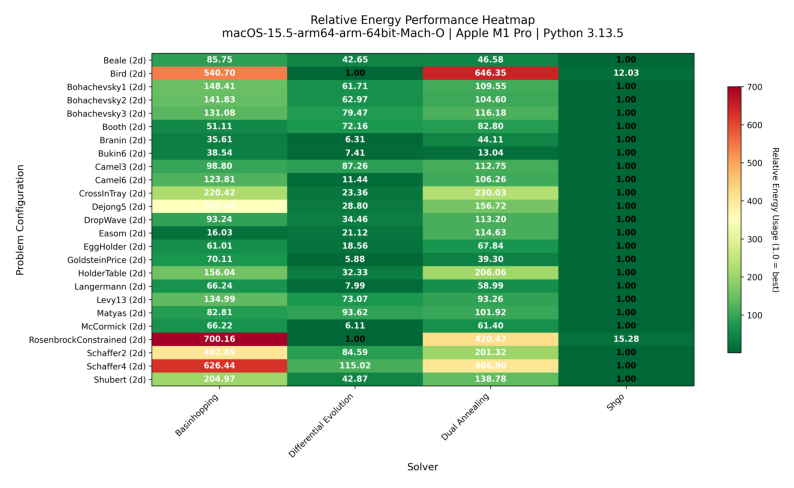

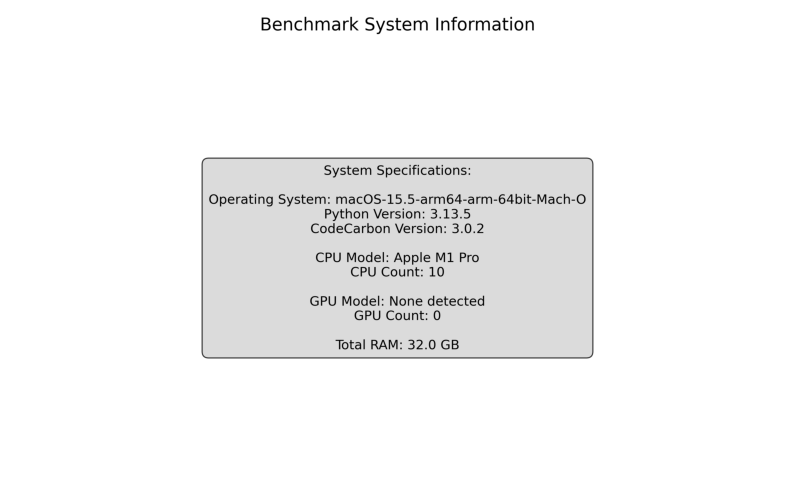

## Summary Energy Statistics:

,energy_consumed_mean,energy_consumed_std,energy_consumed_median,energy_consumed_min,energy_consumed_max,cpu_energy_mean,gpu_energy_mean,ram_energy_mean
Basinhopping,3.156840e-07,2.029382e-07,2.671430e-07,3.052161e-08,1.006686e-06,1.435330e-07,0.0,1.721510e-07
Differential Evolution,8.624827e-08,6.219787e-08,6.580196e-08,3.494202e-10,2.023330e-07,3.923769e-08,0.0,4.701058e-08
Dual Annealing,2.398125e-07,5.707734e-08,2.163142e-07,1.863188e-07,4.999242e-07,1.090493e-07,0.0,1.307633e-07
Shgo,3.578886e-09,5.078778e-09,2.166562e-09,7.105438e-10,5.239697e-08,1.651409e-09,0.0,1.927477e-09


In [5]:
# Path to the figures
figure_path = "ppfigures/energy"

# Get all figure files in the directory
figure_files = glob.glob(os.path.join(figure_path, "*.png"))
figure_files.sort()

# Display each figure
for fig_file in figure_files:
    plt.figure(figsize=(10, 8))
    img = plt.imread(fig_file)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

# Display dataframe
display(Markdown("## Summary Energy Statistics:"))
display(x['data']['energy_summary'])